In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import torch

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [10]:
print("CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

CUDA available: True
Device name: Tesla T4


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fareselmenshawii/face-detection-dataset")
print("Path to dataset files:", path)

100%|██████████| 4.43G/4.43G [00:44<00:00, 108MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3


In [7]:
dataset_yaml = """
path: /root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3

train: images/train
val: images/val

nc: 1
names: ["face"]
"""

with open("/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/dataset.yaml", "w") as f:
    f.write(dataset_yaml)

In [8]:
from PIL import Image
import os

img_dir = "/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/images/train"

sizes = []
for img_name in os.listdir(img_dir):
    if img_name.endswith(('.jpg', '.png', '.jpeg')):
        img = Image.open(os.path.join(img_dir, img_name))
        sizes.append(img.size)  # (width, height)

print("Примеры размеров:", sizes[:10])
print("Мин:", min(sizes), "Макс:", max(sizes))

Примеры размеров: [(1024, 767), (887, 1024), (1024, 683), (1024, 768), (1024, 688), (1024, 868), (1024, 840), (1024, 768), (1024, 686), (1024, 768)]
Мин: (279, 1024) Макс: (4608, 3456)


In [14]:
# import torch
# import gc

# # Удаляем все переменные модели/тензоры, если они есть
# del model  # если есть объект модели
# gc.collect()  # чистим неиспользуемые объекты Python

# # Очищаем кэш CUDA
# torch.cuda.empty_cache()

# # Проверяем свободную память
# !nvidia-smi

Thu Sep 18 07:20:07 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   51C    P0             34W /   70W |     384MiB /  15360MiB |    100%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [15]:
model = YOLO("yolo11m.pt")

In [16]:
results = model.train(
    data="/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/dataset.yaml",
    epochs=3,
    imgsz=640,
    batch=16,
    device=0
    )

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/root/.cache/kagglehub/datasets/fareselmenshawii/face-detection-dataset/versions/3/dataset.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, over

In [22]:
url = "https://www.gnosisonline.org/wp-content/uploads/2018/08/rock-gnosisonline-696x394.png"

results = model.predict(url, conf=0.7)


image 1/1 /content/rock-gnosisonline-696x394.png: 384x640 5 faces, 24.9ms
Speed: 2.1ms preprocess, 24.9ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)


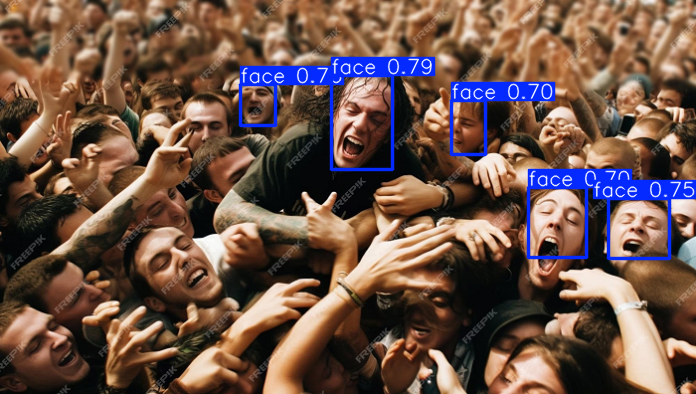

In [23]:
for result in results:
    boxes = result.boxes  # bbox нужен для детекции
    masks = result.masks  # Маска нужна для сегментации
    keypoints = result.keypoints  # Для определения позы
    probs = result.probs  # Для классификации найденного объекта
    obb = result.obb  # Ориентированный bbox
    result.show()